In [28]:
# importing libraries

# for data loading and manipulation
import pandas as pd
import numpy as np

# for visualization/EDA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# for data science and machine learning
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv")
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [3]:
glass_df = df.rename(columns={"1":"Id_number", "1.52101":"RI", "13.64":"Na", "4.49":"Mg", "1.10":"Ai", "71.78":"Si", "0.06":"K", "8.75":"Ca", "0.00":"Ba", "0.00.1":"Fe", "1.1":"Type_of_glasses"})

In [4]:
glass_df.head()

,Id_number,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Type_of_glasses
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


# Exploratory Data Analysis (EDA)

In [5]:
# checking the dimensions of the dataset
glass_df.shape

(213, 11)

This dataset contains 213 rows and 11 columns. Out of which 1 is target variable and remaining 10 are independent variable.

In [6]:
glass_df.columns

Index(['Id_number', 'RI', 'Na', 'Mg', 'Ai', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type_of_glasses'],
      dtype='object')

In [7]:
# checking the columns of the dataset
glass_df.columns.tolist()

['Id_number',
 'RI',
 'Na',
 'Mg',
 'Ai',
 'Si',
 'K',
 'Ca',
 'Ba',
 'Fe',
 'Type_of_glasses']

In [8]:
glass_df.dtypes

Id_number            int64
RI                 float64
Na                 float64
Mg                 float64
Ai                 float64
Si                 float64
K                  float64
Ca                 float64
Ba                 float64
Fe                 float64
Type_of_glasses      int64
dtype: object

There are two different types of data (int64, float64) present in this dataset.

In [9]:
# checking the null values
glass_df.isnull().sum()

Id_number          0
RI                 0
Na                 0
Mg                 0
Ai                 0
Si                 0
K                  0
Ca                 0
Ba                 0
Fe                 0
Type_of_glasses    0
dtype: int64

In [10]:
glass_df.isnull().sum().sum()

0

In [11]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id_number        213 non-null    int64  
 1   RI               213 non-null    float64
 2   Na               213 non-null    float64
 3   Mg               213 non-null    float64
 4   Ai               213 non-null    float64
 5   Si               213 non-null    float64
 6   K                213 non-null    float64
 7   Ca               213 non-null    float64
 8   Ba               213 non-null    float64
 9   Fe               213 non-null    float64
 10  Type_of_glasses  213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


As we can see there are no null values present in the dataset.

# Now Let us check how many instances of each type are there in our dataset

Text(0.5, 1.0, 'Count of Glass Types')

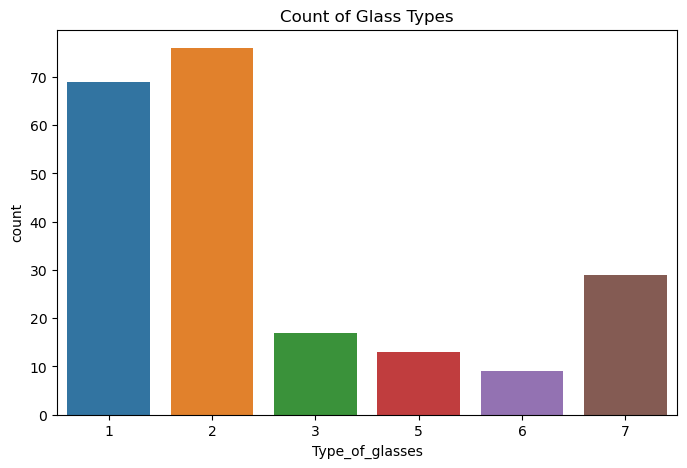

In [12]:
plt.subplots(figsize=(8,5))
sns.countplot(x='Type_of_glasses', data=glass_df).set_title('Count of Glass Types')

We see that Type 2 & Type 1 have the highest occurences in the dataset, so we need to make sure that the train and test dataset have a good representation from all the types. The dataset source is forensic sciences department and probably the reason of the high count of Type 1 & Type 2 is that many criminals break through building window glasses at the scene rather than breaking containers or tableware.

In [13]:
# check both mean and median. Mean seemed more informative
glass_df.groupby('Type_of_glasses', as_index=False).mean()

,Type_of_glasses,Id_number,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe
0,1,36.0,1.518685,13.236522,3.538841,1.164783,72.631304,0.453043,8.797971,0.012899,0.057826
1,2,108.5,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
2,3,155.0,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
3,5,170.0,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
4,6,181.0,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
5,7,200.0,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


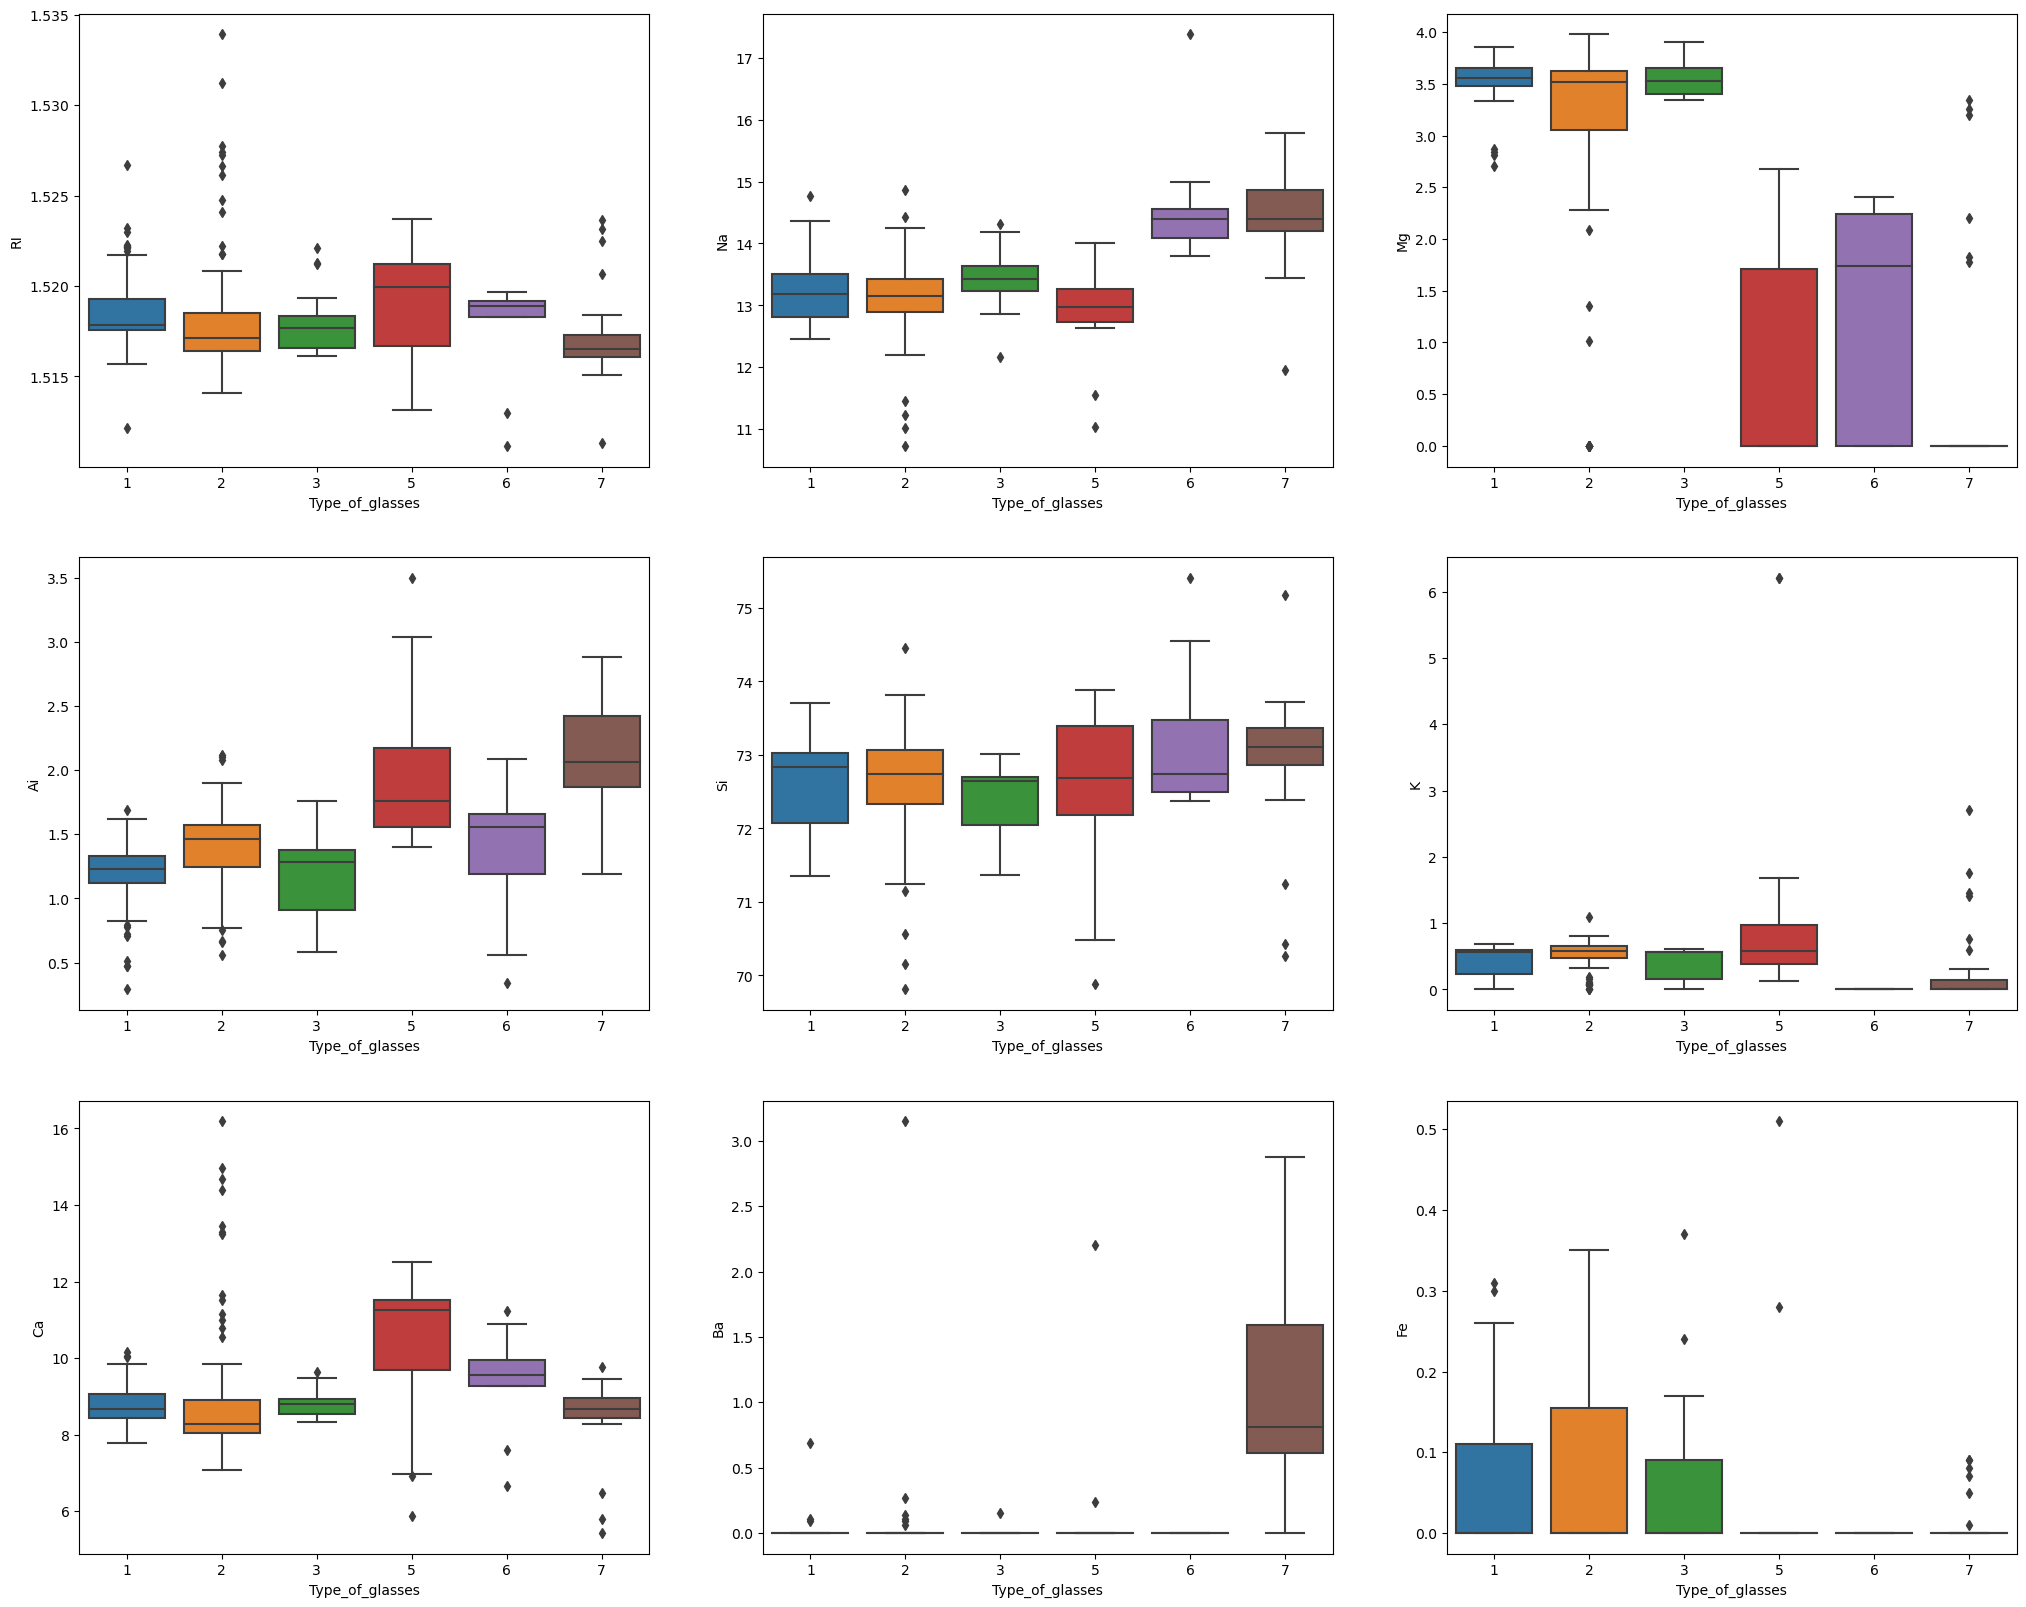

In [14]:
plt.subplots(figsize=(25,20))
plt.subplot(3,3,1)
sns.boxplot(x='Type_of_glasses', y='RI', data=glass_df)
plt.subplot(3,3,2)
sns.boxplot(x='Type_of_glasses', y='Na', data=glass_df)
plt.subplot(3,3,3)
sns.boxplot(x='Type_of_glasses', y='Mg', data=glass_df)
plt.subplot(3,3,4)
sns.boxplot(x='Type_of_glasses', y='Ai', data=glass_df)
plt.subplot(3,3,5)
sns.boxplot(x='Type_of_glasses', y='Si', data=glass_df)
plt.subplot(3,3,6)
sns.boxplot(x='Type_of_glasses', y='K', data=glass_df)
plt.subplot(3,3,7)
sns.boxplot(x='Type_of_glasses', y='Ca', data=glass_df)
plt.subplot(3,3,8)
sns.boxplot(x='Type_of_glasses', y='Ba', data=glass_df)
plt.subplot(3,3,9)
sns.boxplot(x='Type_of_glasses', y='Fe', data=glass_df)
plt.show()

The boxplot shows that averageRefractive Index(RI) is similar for all types. and also we can see that Type 1, 2 & 3 have very similar properties.

Now let's see the relationship between each one of them through a pairplot.( We will leave out k, Ba and Fe due to sparse concentration)

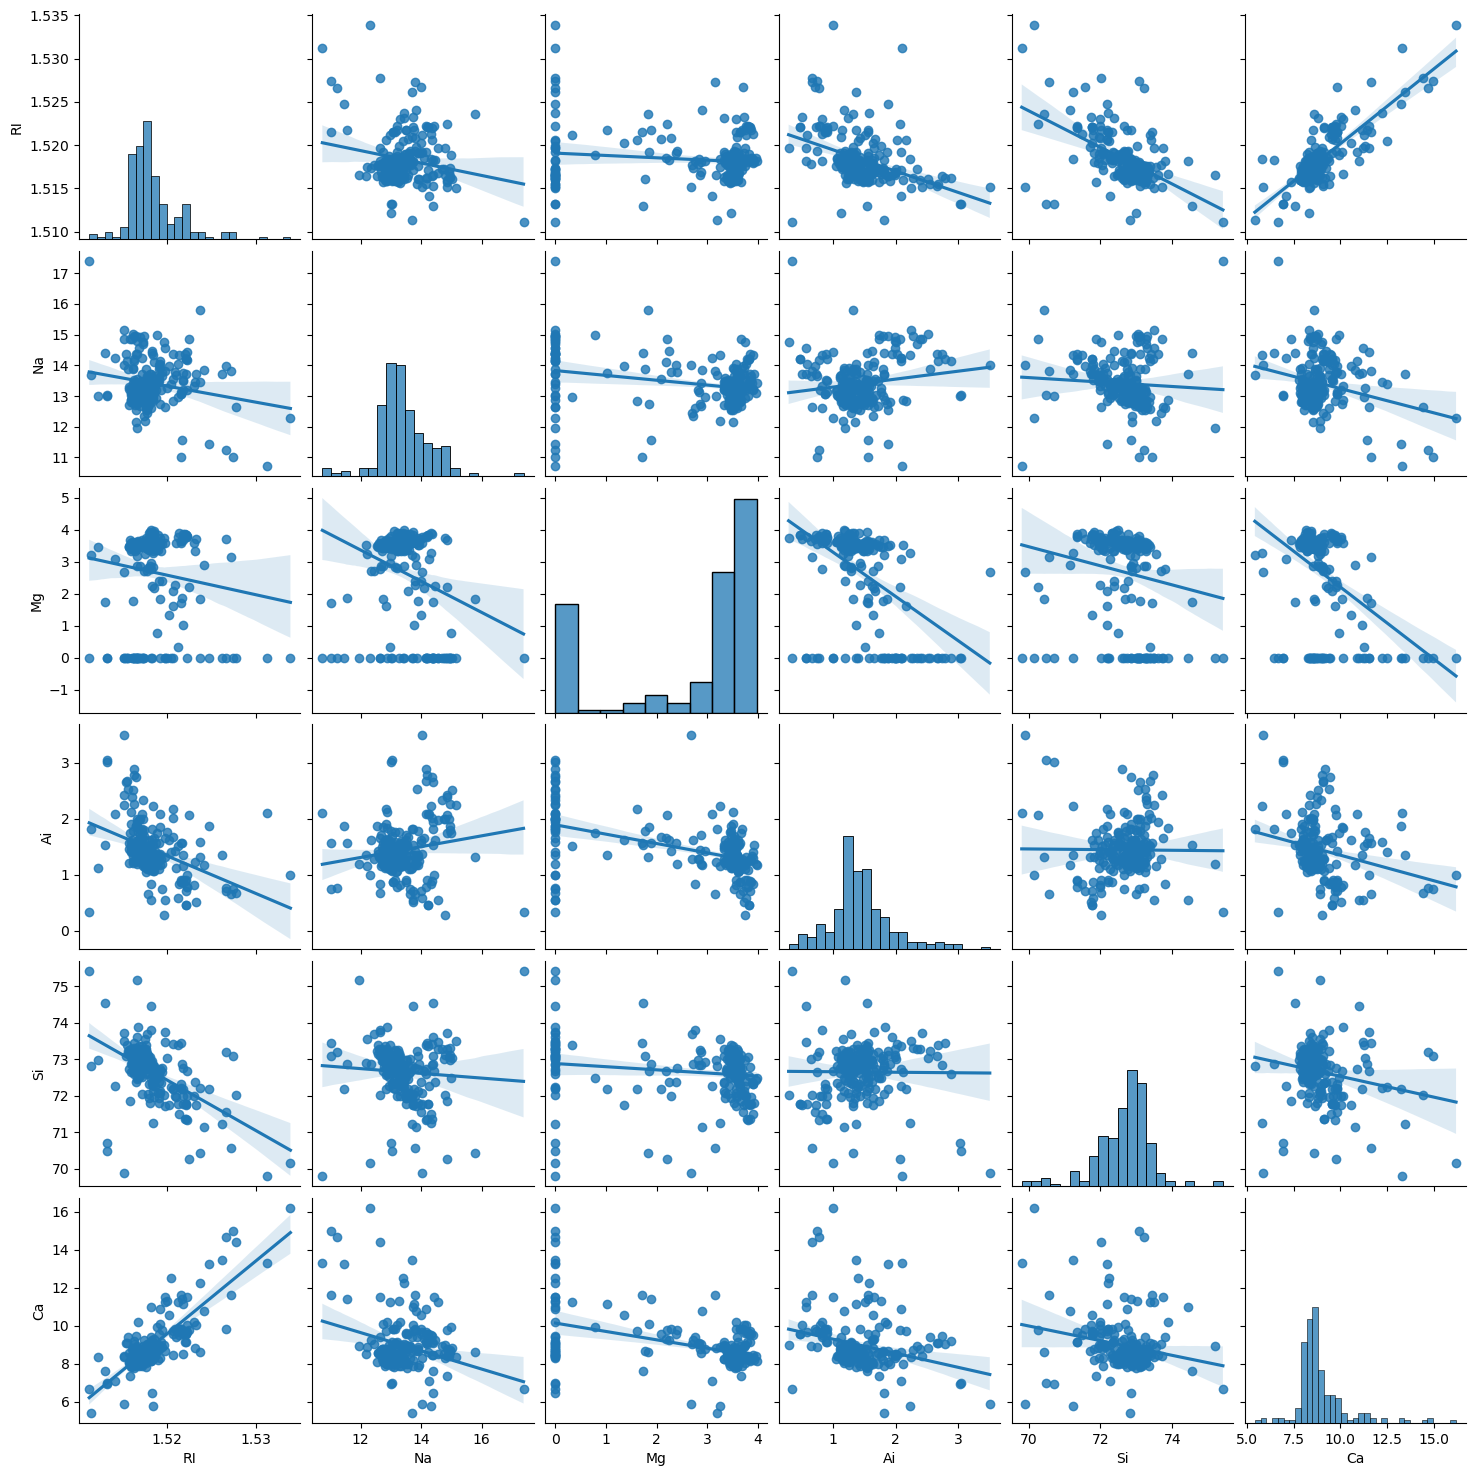

In [15]:
sns.pairplot(glass_df[['RI','Na','Mg','Ai','Si','Ca']], kind='reg')

On most dimensions, the points are scattered. But we can clearly see some strong relationship between Calcium and Refractive index. Si and RI seem to have an inverse relationship.

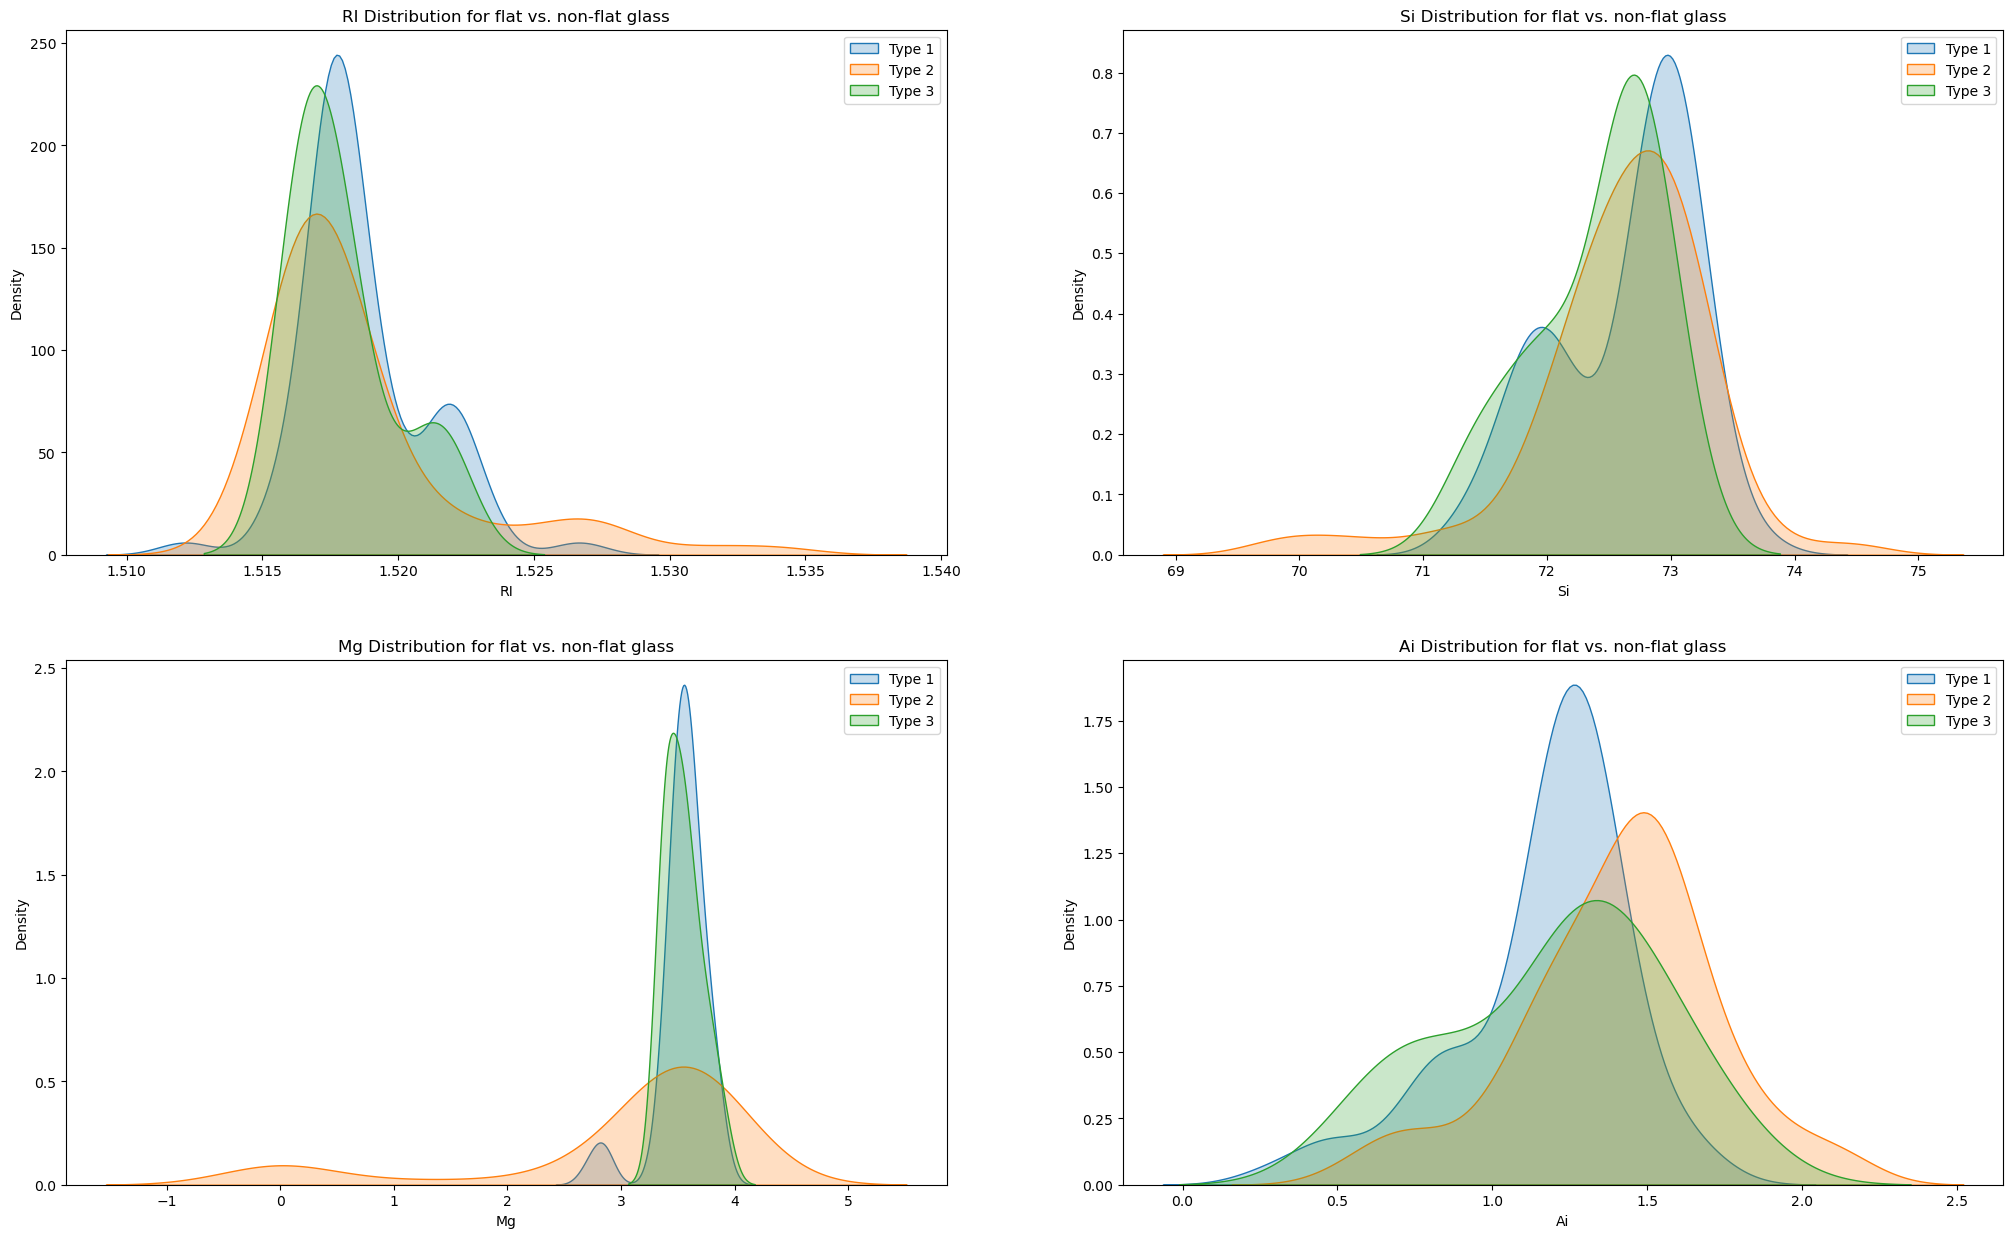

In [16]:
plt.subplots(figsize = (25,15))
plt.subplot(2,2,1)
sns.kdeplot(glass_df["RI"][glass_df.Type_of_glasses == 1], shade=True)
sns.kdeplot(glass_df["RI"][glass_df.Type_of_glasses == 2], shade=True)
sns.kdeplot(glass_df["RI"][glass_df.Type_of_glasses == 3], shade=True)
plt.title("RI Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])

plt.subplot(2,2,2)
sns.kdeplot(glass_df["Si"][glass_df.Type_of_glasses == 1], shade=True)
sns.kdeplot(glass_df["Si"][glass_df.Type_of_glasses == 2], shade=True)
sns.kdeplot(glass_df["Si"][glass_df.Type_of_glasses == 3], shade=True)
plt.title("Si Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])

plt.subplot(2,2,3)
sns.kdeplot(glass_df["Mg"][glass_df.Type_of_glasses == 1], shade=True)
sns.kdeplot(glass_df["Mg"][glass_df.Type_of_glasses == 2], shade=True)
sns.kdeplot(glass_df["Mg"][glass_df.Type_of_glasses == 3], shade=True)
plt.title("Mg Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])

plt.subplot(2,2,4)
sns.kdeplot(glass_df["Ai"][glass_df.Type_of_glasses == 1], shade=True)
sns.kdeplot(glass_df["Ai"][glass_df.Type_of_glasses == 2], shade=True)
sns.kdeplot(glass_df["Ai"][glass_df.Type_of_glasses == 3], shade=True)
plt.title("Ai Distribution for flat vs. non-flat glass")
plt.legend(['Type 1', 'Type 2', 'Type 3'])

Mostly the flat ones (1,3) overlap on all the properties except Aluminium. Aluminium has a wider range for type 3 than type 1. The non-flat glass, type 2 has many extreme points which make its range very high.

# Let us plot a correlation heatmap of identify multicollinearity 

<Axes: >

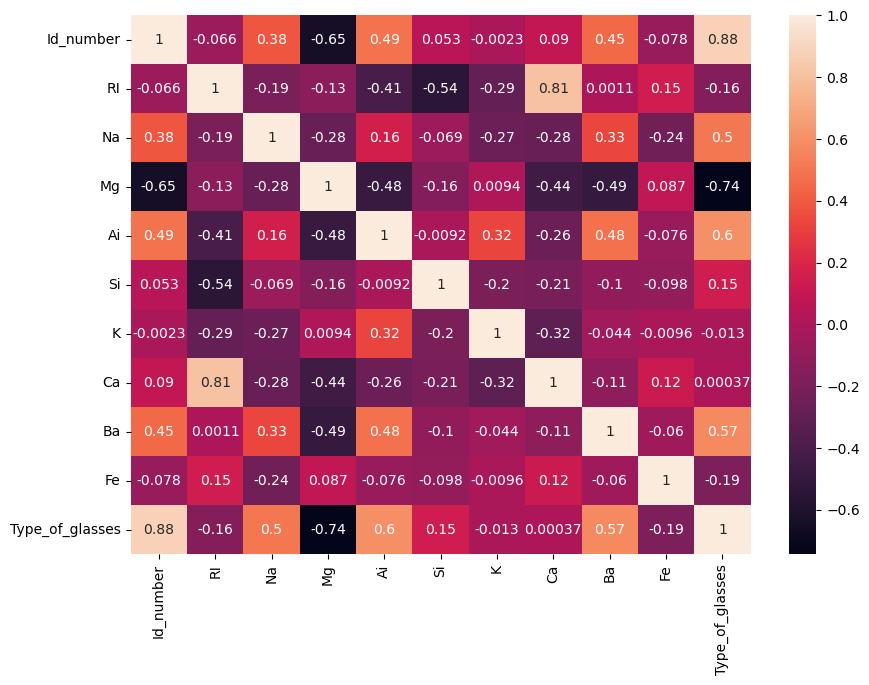

In [22]:
plt.subplots(figsize=(10,7))
sns.heatmap(glass_df.corr(), annot=True)

                      P1    P2    P3    P4    P5   P6    P7   P8   P9
Explained_Variance  3.01  1.66  0.68  0.65  0.21  0.1  0.01  0.0  0.0


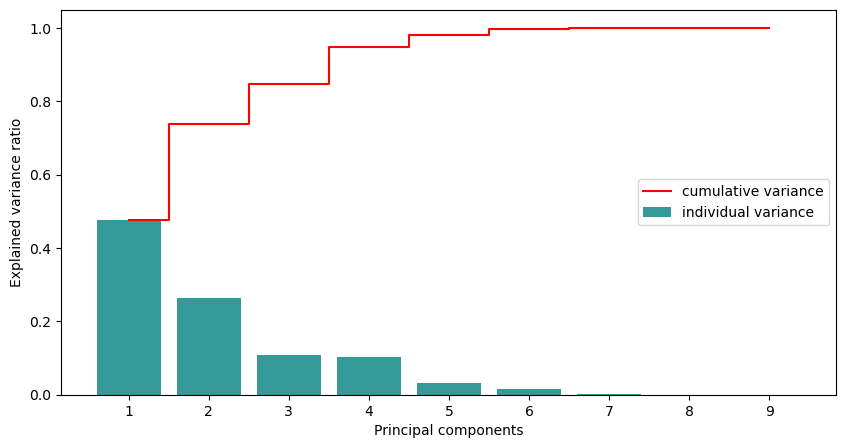

In [30]:
# Performing PCA
X_var = glass_df[['RI','Na','Mg','Ai','Si','K','Ca','Ba','Fe']]
pca = PCA(random_state = 1)
pca.fit(X_var)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)], columns=["Explained_Variance"])
print(var_df.T)
plt.figure(figsize=(10,5))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

The first 5 components account for about 99% of the total explained variance. We can run the analysis again only with these five components.

In [31]:
pca_red = PCA(n_components=5)
X_reduced = pca_red.fit_transform(X_var)

Now that we have our features and target labels, let us proceed to model development.

# Model Development

In [36]:
# Separating the response (y) and explanatory (x) variables
X = X_reduced
y = glass_df["Type_of_glasses"].values

In [37]:
# Splitting the dataset into test and training with 70% for training the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [38]:
# Check whether the train and test have instances of all the glass types
print(np.unique(y_train))
print(np.unique(y_test))

[1 2 3 5 6 7]
[1 2 3 5 6 7]


# Testing Candidate models

In [43]:
# Support Vector Machines
svmMod = SVC()
svmMod.fit(X_train,y_train)
y_pred = svmMod.predict(X_test)
sc1 = metrics.accuracy_score(y_pred,y_test)

# Gradient Boost Classifier
gbmMod = GradientBoostingClassifier(max_depth = 3, n_estimators = 100, learning_rate = 0.05, random_state = 1)
gbmMod.fit(X_train,y_train)
y_pred = gbmMod.predict(X_test)
sc2 = metrics.accuracy_score(y_pred,y_test)

# Decision Tree
DecTree = tree.DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred = DecTree.predict(X_test)
sc3 = metrics.accuracy_score(y_pred,y_test)

# Random Forest
RandFor = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 50, random_state = 1)
RandFor.fit(X_train, y_train)
y_pred = RandFor.predict(X_test)
sc4 = metrics.accuracy_score(y_pred,y_test)

In [44]:
print(DecTree.feature_importances_)
print(RandFor.feature_importances_)
print(gbmMod.feature_importances_)

[0.2662549  0.30182121 0.11740191 0.230019   0.08450298]
[0.32540329 0.32420066 0.04144739 0.19049033 0.11845833]
[0.38239148 0.26243975 0.07869043 0.22146642 0.05501193]


In [45]:
# Compare accuracy of models
pd.DataFrame([['Support Vector Machine',sc1],['Gradient Boost',sc2],['Decision Tree',sc3],['Random Forest',sc4]], columns=['Model','Accuracy'])

,Model,Accuracy
0,Support Vector Machine,0.687500
1,Gradient Boost,0.750000
2,Decision Tree,0.656250
3,Random Forest,0.765625


Random Forest gives the highest accuracy and all the features seem to be important from the other models. So, we will retain Random Forest as our final model and perform hyperparameter tuning to improve it.

# Hyperparameter tuning

In [46]:
tuned_parameters = [{'kernel': ['rbf','linear'], 'gamma': [0.001, 0.01, 0.1, 10], 'C': [0.001, 0.01, 0.1, 1, 10]}]
grid = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(grid.best_params_)

Best parameters set found on development set:

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


# Running final model

In [47]:
model = grid.best_estimator_
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

0.796875

# Model Performance

Text(239.47222222222223, 0.5, 'predicted label')

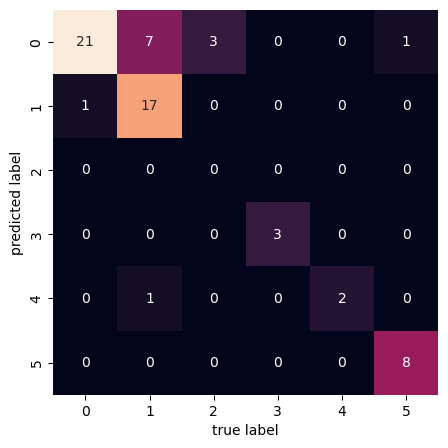

In [49]:
# Let's plot the confusion matrix
mat = confusion_matrix(y_test, y_pred)
plt.subplots(figsize=(9,5))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.66      0.95      0.78        22
           2       0.94      0.68      0.79        25
           3       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.89      0.94         9

    accuracy                           0.80        64
   macro avg       0.71      0.75      0.72        64
weighted avg       0.80      0.80      0.78        64

